In [212]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sierpinski(n_points):
    x = np.zeros(n_points)
    y = np.zeros(n_points)
    for i in range(1, n_points):
        c = np.random.randint(0, 3)
        if c == 0:
            x[i] = 0.5 * x[i-1]
            y[i] = 0.5 * y[i-1]
        elif c == 1:
            x[i] = 0.5 * x[i-1] + 0.25
            y[i] = 0.5 * y[i-1] + np.sqrt(3)/4
        else:
            x[i] = 0.5 * x[i-1] + 0.5
            y[i] = 0.5 * y[i-1]
    return x, y


In [213]:
def plot_sierpinski(n_points=100000):
    x, y = generate_sierpinski(n_points)

    plt.figure(figsize=(8, 8))  
    plt.figure(facecolor='black')  
    plt.gca().set_facecolor('black')  

    plt.scatter(x, y, s=0.1, c='cyan', alpha=0.5)

    plt.title(f'Sierpinski Triangle ({n_points:,} Points)', color='white')
    plt.tick_params(axis='both', colors='white')  
    plt.axis('equal')  
    plt.show()

<Figure size 800x800 with 0 Axes>

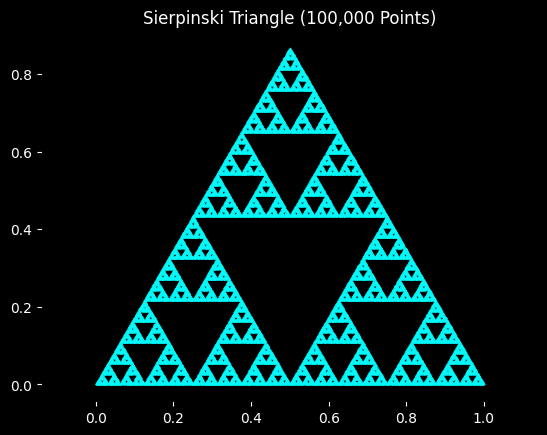

In [214]:
plot_sierpinski(100000)

<Figure size 800x800 with 0 Axes>

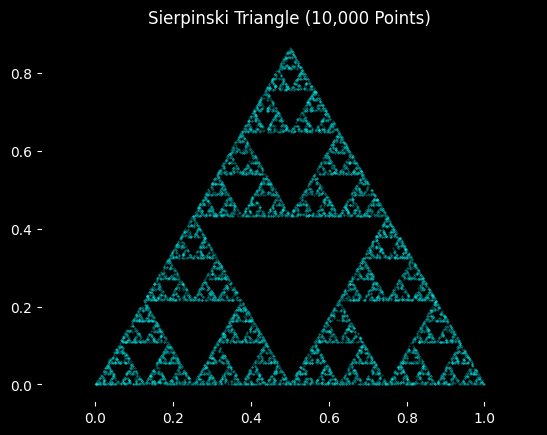

In [215]:
plot_sierpinski(10000)

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

In [217]:
def generate_sierpinski(n_points):
    x = np.zeros(n_points)
    y = np.zeros(n_points)
    for i in range(1, n_points):
        c = np.random.randint(0, 3)
        if c == 0:
            x[i] = 0.5 * x[i-1]
            y[i] = 0.5 * y[i-1]
        elif c == 1:
            x[i] = 0.5 * x[i-1] + 0.25
            y[i] = 0.5 * y[i-1] + np.sqrt(3)/4
        else:
            x[i] = 0.5 * x[i-1] + 0.5
            y[i] = 0.5 * y[i-1]
    return np.column_stack((x, y))


In [218]:
def estimate_dimension_idpettis(points, k=5):
    tree = KDTree(points)
    distances, _ = tree.query(points, k=k+1)  
    nearest_dists = distances[:, 1:]  
    # Avoid division by zero and invalid ratios
    valid_mask = nearest_dists[:, 0] > 0
    ratios = np.zeros_like(nearest_dists[:, -1])
    ratios[valid_mask] = nearest_dists[valid_mask, -1] / nearest_dists[valid_mask, 0]
    # Avoid log(0) by filtering valid ratios
    valid_ratios = ratios[ratios > 0]
    if len(valid_ratios) == 0:
        raise ValueError("No valid ratios found. Check the input data.")
    return np.mean(np.log(valid_ratios) / np.log(k))

In [219]:
def analyze_sensitivity(n_points=100000, k_range=range(5, 16)):
    """Analyze sensitivity of intrinsic dimensionality estimation with respect to K."""
    points = generate_sierpinski(n_points)
    dimensions = []
    for k in k_range:
        try:
            dim = estimate_dimension_idpettis(points, k)
            dimensions.append(dim)
        except ValueError as e:
            print(f"Error for k={k}: {e}")
            dimensions.append(np.nan)
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, dimensions, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Estimated Intrinsic Dimension')
    plt.title(f'Sensitivity Analysis of Intrinsic Dimension ({n_points:,} Points)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return dimensions

In [220]:

# Part a
points_10k = generate_sierpinski(10000)
points_100k = generate_sierpinski(100000)

In [221]:
# Part b
dim_10k = estimate_dimension_idpettis(points_10k, k=5)
dim_100k = estimate_dimension_idpettis(points_100k, k=5)
print(f"Estimated intrinsic dimension for 10,000 points: {dim_10k:.4f}")
print(f"Estimated intrinsic dimension for 100,000 points: {dim_100k:.4f}")

Estimated intrinsic dimension for 10,000 points: 0.8085
Estimated intrinsic dimension for 100,000 points: 0.8216


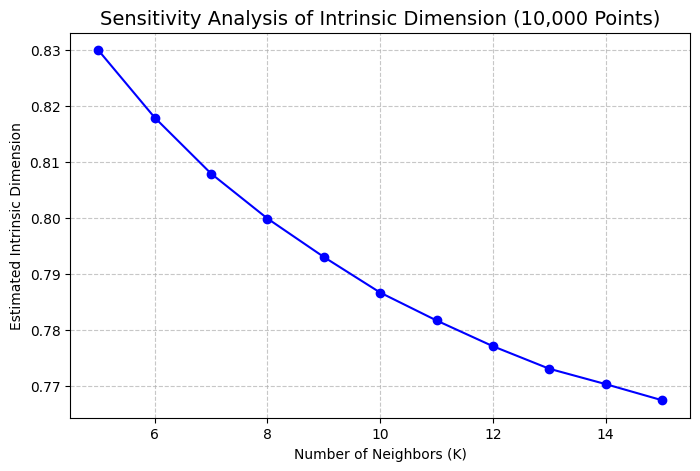

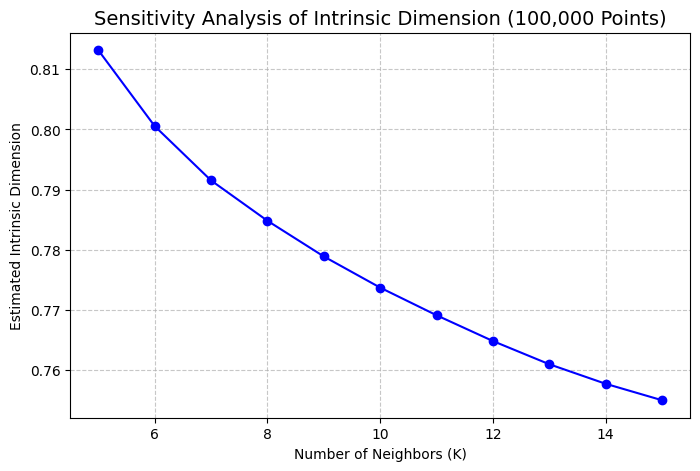

[np.float64(0.8131838990049667),
 np.float64(0.8005582961204984),
 np.float64(0.7915239406941273),
 np.float64(0.7848199949205411),
 np.float64(0.7788839291167907),
 np.float64(0.7737000668477907),
 np.float64(0.7691057318386382),
 np.float64(0.764815529181724),
 np.float64(0.7609582570905004),
 np.float64(0.7577079970930604),
 np.float64(0.7549713654629671)]

In [222]:

# Part c
analyze_sensitivity(10000, k_range=range(5, 16))
analyze_sensitivity(100000, k_range=range(5, 16))